In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)


2.4.1


In [4]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
plt.imshow()

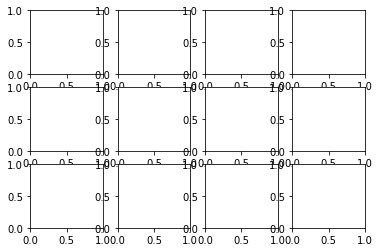

In [6]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1 # Chooses the filter, i.e, the feature to detect.

2


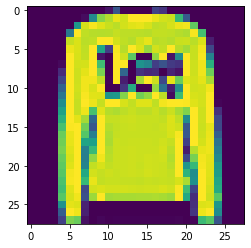

In [17]:
plt.imshow(test_images[FIRST_IMAGE])
print(test_labels[FIRST_IMAGE])

In [ ]:
plt.imshow(test_images[FIRST_IMAGE])

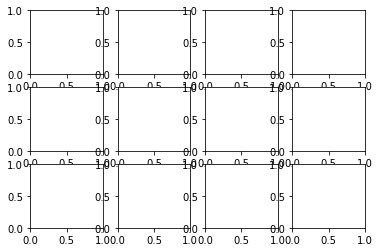

In [20]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1 # Chooses the filter, i.e, the feature to detect.
from tensorflow.keras import models

# Loop through the layers to see the image at each stage. Layers are CONV, POOL, CONV, POOL.
layer_outputs = [layer.output for layer in model.layers]

# Create a new model that uses the earlier model's input and outputs the values at each layer.
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


In [28]:
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]

In [29]:
f1[0].shape

(5, 5, 64)

In [23]:
plt.imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
# axarr[0,x].grid(False)

TypeError: list indices must be integers or slices, not tuple

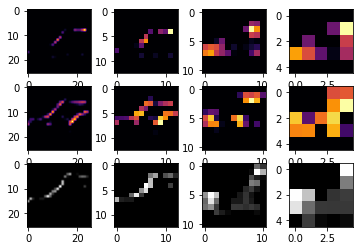

In [19]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1 # Chooses the filter, i.e, the feature to detect.
from tensorflow.keras import models

# Loop through the layers to see the image at each stage. Layers are CONV, POOL, CONV, POOL.
layer_outputs = [layer.output for layer in model.layers]

# Create a new model that uses the earlier model's input and outputs the values at each layer.
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[2,x].grid(False)